# Visualizing the cityscapes dataset

In [16]:
from torchvision.datasets.cityscapes import Cityscapes
from IPython.display import Image 
from PIL import Image, ImageDraw
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display # to display images
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [24, 15]
plt.rcParams['figure.dpi'] = 200
import os
import csv
import json
import pandas as pd

In [2]:
root = '/media/romilb/NEW VOLUME/cityscapes/dataset'

In [3]:
dataset = Cityscapes(root=root, target_type='polygon')

In [4]:
def get_rectangle_from_polygon(polygon_coords):
    x_list = [c[0] for c in polygon_coords]
    y_list = [c[1] for c in polygon_coords]
    return [min(x_list), min(y_list), max(x_list), max(y_list)]

### Read image and visualize

In [5]:
img, target = dataset[0]

In [22]:
def disp(idx=0):
    img, target = dataset[idx]
    draw = ImageDraw.Draw(img)
    for obj in target['objects']:
        if obj["label"] in ['person', 'car']:
            polygon = [tuple(c) for c in obj["polygon"]]
            draw.line(polygon, fill=(255,0,0,128), width=5)
            rect = get_rectangle_from_polygon(obj["polygon"])
            draw.rectangle(rect, width=2)
    imshow(np.asarray(img))

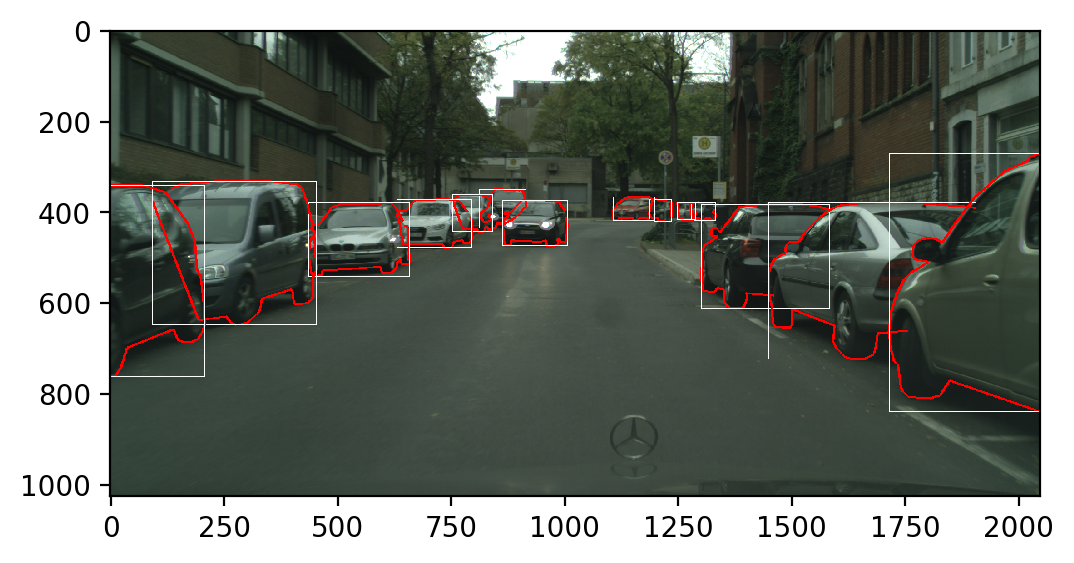

In [23]:
disp(40)

In [24]:
interact(disp, idx=(0,1000))

interactive(children=(IntSlider(value=0, description='idx', max=1000), Output()), _dom_classes=('widget-intera…

<function __main__.disp(idx=0)>

In [9]:
import PIL
PIL.__version__

'6.1.0'

In [10]:
def generate_classification_index(root, split='train', mode='fine', classes_of_interest_map=None):
    root = root
    mode = 'gtFine' if mode == 'fine' else 'gtCoarse'
    images_dir = os.path.join(root, 'leftImg8bit', split)
    targets_dir = os.path.join(root, mode, split)
    split = split
    images = []
    targets = []
    target_type = 'polygon'
    if classes_of_interest_map is None:
        # This is a map mapping str labels to class ids
        classes_of_interest_map = {'person': 0,
                               'car': 1,
                               'truck': 2,
                               'bus': 3,
                               'bicycle': 4,
                               'motorcycle': 5
                              }
        
    
    classification_index = [] # A list of list of format [idx, imgpath, x0, y0, x1, y1]
    idx_ctr = 0

    if mode not in ['gtFine', 'gtCoarse']:
        raise ValueError('Invalid mode! Please use mode="fine" or mode="coarse"')

    if mode == 'fine' and split not in ['train', 'test', 'val']:
        raise ValueError('Invalid split for mode "fine"! Please use split="train", split="test"'
                         ' or split="val"')
    elif mode == 'coarse' and split not in ['train', 'train_extra', 'val']:
        raise ValueError('Invalid split for mode "coarse"! Please use split="train", split="train_extra"'
                         ' or split="val"')

    if not os.path.isdir(images_dir) or not os.path.isdir(targets_dir):
        raise RuntimeError('Dataset not found or incomplete. Please make sure all required folders for the'
                           ' specified "split" and "mode" are inside the "root" directory')
    classification_index = []
    for city in os.listdir(images_dir):
        img_dir = os.path.join(images_dir, city)
        target_dir = os.path.join(targets_dir, city)
        for file_name in os.listdir(img_dir):
            image = os.path.join(split, city, file_name)
            
            target_filename = '{}_{}_polygons.json'.format(file_name.split('_leftImg8bit')[0], mode)
            target_data = _load_json(os.path.join(target_dir, target_filename))
            
            # Iterate over objects and get objs of interest
            for obj in target_data['objects']:
                if obj["label"] in classes_of_interest_map.keys():
                    class_id = classes_of_interest_map[obj["label"]]
                    x0, y0, x1, y1 = get_rectangle_from_polygon(obj["polygon"])
                    data = [idx_ctr, image, class_id, x0, y0, x1, y1]
                    classification_index.append(data)
                    idx_ctr += 1
    return classification_index

def _load_json(path):
    with open(path, 'r') as file:
        json_data = json.load(file)
    return json_data

def dump_to_csv(list_of_lists, filepath):
    with open(filepath, "w") as f:
        writer = csv.writer(f)
        writer.writerows(list_of_lists)

In [139]:
x=generate_classification_index(root)

In [140]:
len(x)

50491

In [141]:
dump_to_csv(x,'classification_list.csv')

# Visualize custom classification list

In [9]:
data = pd.read_csv('classification_list.csv', names=["idx", "imgpath", "class", "x0", "y0", "x1", "y1"])

In [10]:
def disp(idx):
    item = data.iloc[idx,:]
    img = Image.open(os.path.join(root, "leftImg8bit", item["imgpath"])).convert('RGB')
    draw = ImageDraw.Draw(img)
    rect = [item["x0"], item["y0"], item["x1"], item["y1"]]
    draw.rectangle(rect, width=2)
    imshow(np.asarray(img))
    print(item)

In [11]:
len(data)

50491

idx                                                    41000
imgpath    train/stuttgart/stuttgart_000008_000019_leftIm...
class                                                      0
x0                                                      1752
y0                                                       414
x1                                                      1788
y1                                                       496
Name: 41000, dtype: object


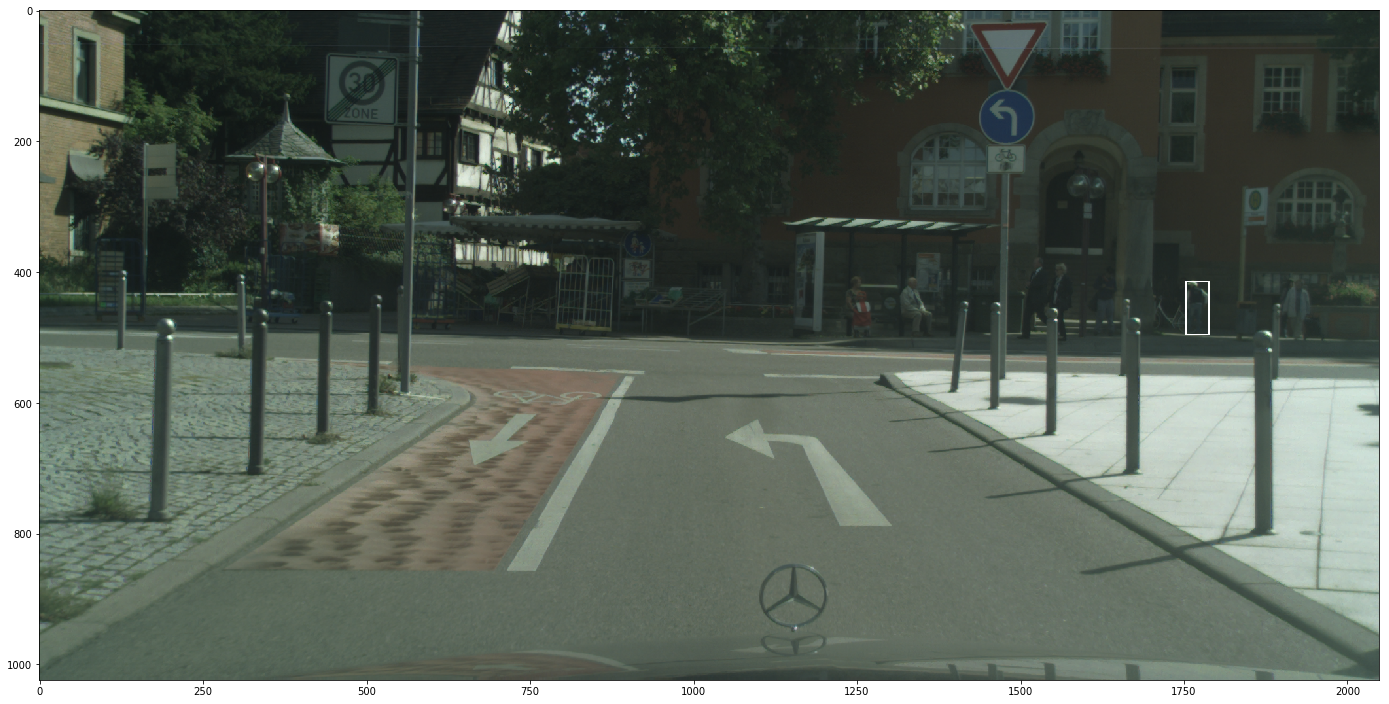

In [17]:
disp(41000)

In [97]:
interact(disp, idx=(0,1000))

interactive(children=(IntSlider(value=500, description='idx', max=1000), Output()), _dom_classes=('widget-inte…

<function __main__.display_image(idx)>

## Inclearn integration

In [3]:
from inclearn.lib.CityscapesClassification import CityscapesClassification

In [19]:
CityscapesClassification.generate_sample_list(root,write_filename="pedvehicle")

[[0,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  609,
  420,
  807,
  532],
 [1,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  145,
  429,
  304,
  502],
 [2,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  145,
  429,
  304,
  502],
 [3,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1962,
  488,
  2047,
  526],
 [4,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1512,
  446,
  1660,
  499],
 [5,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1479,
  456,
  1634,
  514],
 [6,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1862,
  481,
  1937,
  500],
 [7,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1872,
  486,
  1956,
  513],
 [8,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  1721,
  450,
  1864,
  509],
 [9,
  'train/aachen/aachen_000000_000019_leftImg8bit.png',
  1,
  145,
  429,
  304,
  502],
 [10,
  'train/aachen/aachen_000000_000019_leftI

In [4]:
ds = CityscapesClassification(root, os.path.join('/media/romilb/NEW VOLUME/cityscapes/dataset/pedvehicle_train_gtFine.csv'))

In [5]:
len(ds)

50491

In [57]:
def disp(idx):
    x,y = ds[idx]
    x.show()

0


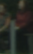

In [77]:
x,y = ds[12]
print(y)
x

1

# Analysis

In [11]:
def generate_classification_index(root, split='train', mode='fine'):
    root = root
    mode = 'gtFine' if mode == 'fine' else 'gtCoarse'
    images_dir = os.path.join(root, 'leftImg8bit', split)
    targets_dir = os.path.join(root, mode, split)
    split = split
    images = []
    targets = []
    target_type = 'polygon'
        
    
    classification_index = [] # A list of list of format [idx, imgpath, x0, y0, x1, y1]
    idx_ctr = 0

    if mode not in ['gtFine', 'gtCoarse']:
        raise ValueError('Invalid mode! Please use mode="fine" or mode="coarse"')

    if mode == 'fine' and split not in ['train', 'test', 'val']:
        raise ValueError('Invalid split for mode "fine"! Please use split="train", split="test"'
                         ' or split="val"')
    elif mode == 'coarse' and split not in ['train', 'train_extra', 'val']:
        raise ValueError('Invalid split for mode "coarse"! Please use split="train", split="train_extra"'
                         ' or split="val"')

    if not os.path.isdir(images_dir) or not os.path.isdir(targets_dir):
        raise RuntimeError('Dataset not found or incomplete. Please make sure all required folders for the'
                           ' specified "split" and "mode" are inside the "root" directory')
    classification_index = []
    for city in os.listdir(images_dir):
        img_dir = os.path.join(images_dir, city)
        target_dir = os.path.join(targets_dir, city)
        for file_name in os.listdir(img_dir):
            image = os.path.join(split, city, file_name)
            
            target_filename = '{}_{}_polygons.json'.format(file_name.split('_leftImg8bit')[0], mode)
            target_data = _load_json(os.path.join(target_dir, target_filename))
            
            # Iterate over objects and get objs of interest
            for obj in target_data['objects']:
                class_id = obj["label"]
                data = [idx_ctr, image, class_id]
                classification_index.append(data)
                idx_ctr += 1
    return classification_index

In [12]:
d = generate_classification_index(root)

In [13]:
from pandas import DataFrame
d = DataFrame.from_records(d, columns=["idx", "img", "class"])

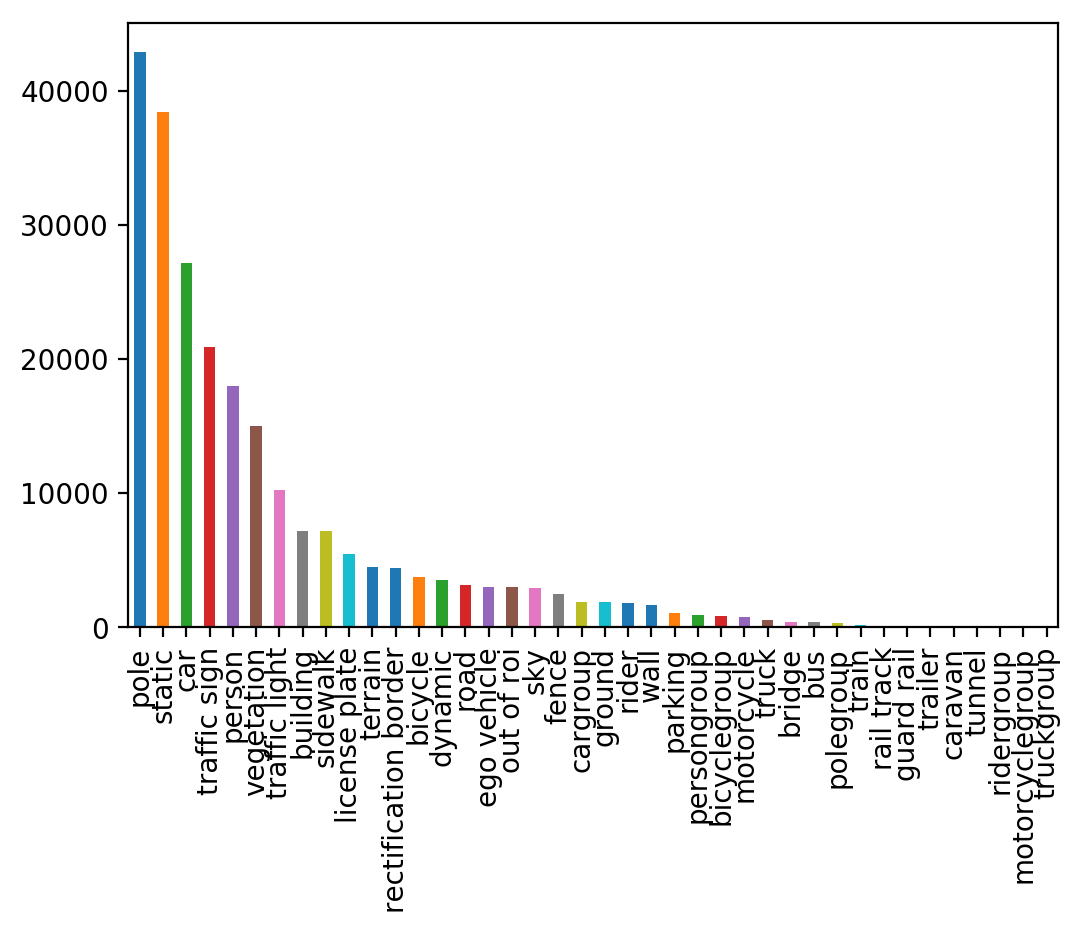

In [17]:
d["class"].value_counts().plot('bar')

# Using the incremental dataset